## <center>ARIMA modelling using pmdarima library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./MaunaLoaDailyTemps.csv',parse_dates=['DATE'])
data.head()

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,2014-01-01,33.0,46.0,40.0,657,1756
1,2014-01-02,35.0,50.0,43.0,657,1756
2,2014-01-03,36.0,45.0,41.0,657,1757
3,2014-01-04,32.0,41.0,37.0,658,1757
4,2014-01-05,24.0,38.0,31.0,658,1758


#### Set DATE column as index

In [3]:
data.set_index('DATE', inplace=True)

In [4]:
data.head()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1825 entries, 2014-01-01 to 2018-12-30
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MinTemp  1821 non-null   float64
 1   MaxTemp  1821 non-null   float64
 2   AvgTemp  1821 non-null   float64
 3   Sunrise  1825 non-null   int64  
 4   Sunset   1825 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 85.5 KB


#### Preprocessing

In [6]:
data.isnull().mean()*100

MinTemp    0.219178
MaxTemp    0.219178
AvgTemp    0.219178
Sunrise    0.000000
Sunset     0.000000
dtype: float64

In [7]:
data.duplicated().sum()

46

In [8]:
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

#### Lets focus on the average temperature only,and drop all the other columns

In [9]:
data.columns

Index(['MinTemp', 'MaxTemp', 'AvgTemp', 'Sunrise', 'Sunset'], dtype='object')

In [10]:
data.drop(columns = ['MinTemp', 'MaxTemp','Sunrise', 'Sunset'],inplace=True)

In [11]:
data.head()

,AvgTemp
DATE,
2014-01-01,40.0
2014-01-02,43.0
2014-01-03,41.0
2014-01-04,37.0
2014-01-05,31.0


#### Checking the stationarity

In [12]:
data_adf = adfuller(data)

#### Test statistic

In [13]:
data_adf[0]

-6.1541990764358285

#### P value

In [14]:
data_adf[1]

7.436482655947371e-08

#### CI value

In [15]:
data_adf[4]

{'1%': -3.434068828903083,
 '5%': -2.8631826560063542,
 '10%': -2.5676445003500348}

#### Since the P value is very small, we can conclude that the dataset is stationary

In [16]:
stepwise_fit = auto_arima(data.AvgTemp, trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8164.143, Time=2.31 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10099.449, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8194.424, Time=0.17 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=8924.221, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=18706.026, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8182.849, Time=0.94 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8183.758, Time=1.84 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8172.391, Time=2.51 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8140.885, Time=2.56 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8151.137, Time=2.24 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8143.727, Time=2.94 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8135.193, Time=2.94 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=8122.895, Time=2.80 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=8279.499, Time=0.80 sec
 ARIMA(1,0,5)(0,0,0)[0] interce

In [17]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1775
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -4052.794
Date:                Fri, 13 Oct 2023   AIC                           8121.589
Time:                        08:43:33   BIC                           8165.441
Sample:                             0   HQIC                          8137.788
                               - 1775                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.1503      0.357      3.222      0.001       0.451       1.850
ar.L1          0.9752      0.008    126.558      0.000       0.960       0.990
ma.L1         -0.1279      0.024     -5.325      0.000      -0.175      -0.081
ma.L2         -0.2283      0.025     -9.288      0.000      -0.276      -0.180
ma.L3         -0.2063      0.024     -8.529      0.000      -0.254      -0.159
ma.L4         -0.1272      0.023     -5.469      0.000      -0.173      -0.082
ma.L5         -0.0476      0.025     -1.896      0.058      -0.097       0.002
sigma2         5.6317      0.181     31.030      0.000       5.276       5.987
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                14.79
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                            -0.16
Prob(H) (two-sided):                  0.09   Kurtosis:                         3.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Splitting the data into training and testing

We will preserve the last 30 rows as the testing set and rest as our training set

In [18]:
train = data.iloc[:-30]
test = data.iloc[-30:]

In [19]:
train.shape

(1745, 1)

In [20]:
test.shape

(30, 1)

In [21]:
model = sm.tsa.arima.ARIMA(train, order=(1,0,5))

In [22]:
model = model.fit()

In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1745
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -3982.233
Date:                Fri, 13 Oct 2023   AIC                           7980.465
Time:                        08:43:35   BIC                           8024.182
Sample:                             0   HQIC                          7996.628
                               - 1745                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.5730      0.760     61.284      0.000      45.084      48.063
ar.L1          0.9851      0.005    181.753      0.000       0.975       0.996
ma.L1         -0.1394      0.023     -5.934      0.000      -0.185      -0.093
ma.L2         -0.2369      0.024     -9.852      0.000      -0.284      -0.190
ma.L3         -0.2235      0.024     -9.358      0.000      -0.270      -0.177
ma.L4         -0.1393      0.023     -6.008      0.000      -0.185      -0.094
ma.L5         -0.0504      0.025     -2.021      0.043      -0.099      -0.002
sigma2         5.6150      0.182     30.792      0.000       5.258       5.972
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                10.95
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.14
Prob(H) (two-sided):                  0.08   Kurtosis:                         3.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Predictions using test data

We need to provide the starting index and ending index

Starting index will be the end of training index

In [24]:
start = len(train)
end = len(train)+len(test)-1

In [25]:
start

1745

In [26]:
end

1774

In [27]:
prediction = model.predict(start=start, end = end , typ = "levels")

In [28]:
prediction

1745    47.702999
1746    46.775936
1747    46.265851
1748    46.013309
1749    45.959690
1750    45.968811
1751    45.977797
1752    45.986649
1753    45.995369
1754    46.003960
1755    46.012423
1756    46.020760
1757    46.028973
1758    46.037064
1759    46.045034
1760    46.052886
1761    46.060622
1762    46.068242
1763    46.075749
1764    46.083144
1765    46.090429
1766    46.097606
1767    46.104676
1768    46.111641
1769    46.118503
1770    46.125262
1771    46.131921
1772    46.138481
1773    46.144944
1774    46.151310
Name: predicted_mean, dtype: float64

For plotting purpose, we need to make dates as index

In [29]:
prediction.index = data.index[start:end+1]

In [30]:
prediction

DATE
2018-11-28    47.702999
2018-11-29    46.775936
2018-12-01    46.265851
2018-12-02    46.013309
2018-12-03    45.959690
2018-12-04    45.968811
2018-12-05    45.977797
2018-12-06    45.986649
2018-12-07    45.995369
2018-12-08    46.003960
2018-12-09    46.012423
2018-12-10    46.020760
2018-12-11    46.028973
2018-12-12    46.037064
2018-12-14    46.045034
2018-12-15    46.052886
2018-12-17    46.060622
2018-12-18    46.068242
2018-12-19    46.075749
2018-12-20    46.083144
2018-12-21    46.090429
2018-12-22    46.097606
2018-12-23    46.104676
2018-12-24    46.111641
2018-12-25    46.118503
2018-12-26    46.125262
2018-12-27    46.131921
2018-12-28    46.138481
2018-12-29    46.144944
2018-12-30    46.151310
Name: predicted_mean, dtype: float64

#### Plotting the result

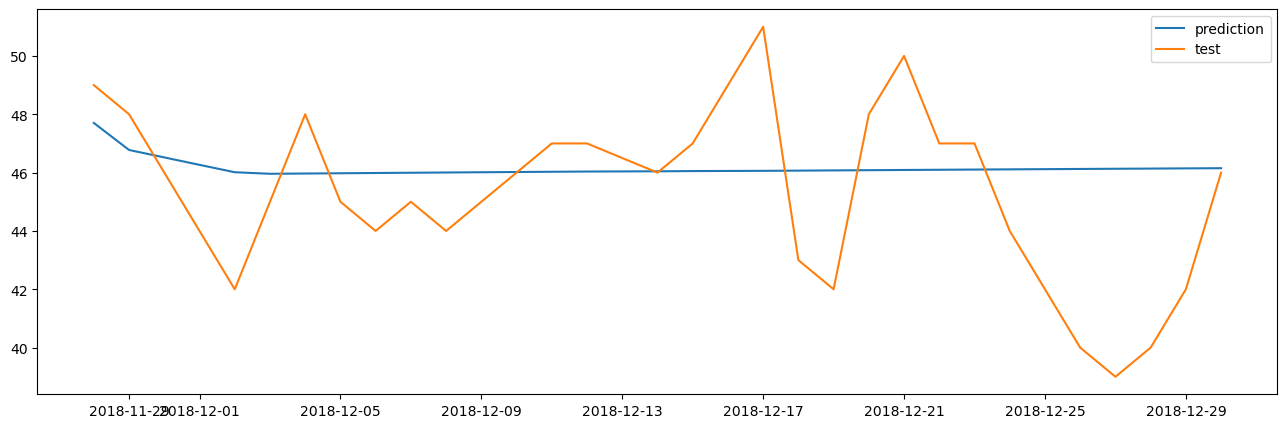

In [31]:
plt.figure(figsize=(16,5))
plt.plot(prediction)
plt.plot(test)
plt.legend(['prediction','test'])
plt.show()

In [32]:
mse = mean_squared_error(prediction,test.AvgTemp)

In [33]:
rmse = np.sqrt(mse)

In [34]:
rmse

3.0488196456481482

We can see that model is good

#### Re training the model on the entire dataset

In [37]:
model_02 = sm.tsa.arima.ARIMA(data.AvgTemp, order=(1,0,5))

In [38]:
model_02 = model_02.fit()

In [39]:
data.tail()

,AvgTemp
DATE,
2018-12-26,40.0
2018-12-27,39.0
2018-12-28,40.0
2018-12-29,42.0
2018-12-30,46.0


#### Predicting future dates after 2018-12-30

#### Making future date indices

In [42]:
index_future_dates = pd.date_range(start="2018-12-30", end = "2019-01-29")

In [43]:
index_future_dates

DatetimeIndex(['2018-12-30', '2018-12-31', '2019-01-01', '2019-01-02',
               '2019-01-03', '2019-01-04', '2019-01-05', '2019-01-06',
               '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
               '2019-01-11', '2019-01-12', '2019-01-13', '2019-01-14',
               '2019-01-15', '2019-01-16', '2019-01-17', '2019-01-18',
               '2019-01-19', '2019-01-20', '2019-01-21', '2019-01-22',
               '2019-01-23', '2019-01-24', '2019-01-25', '2019-01-26',
               '2019-01-27', '2019-01-28', '2019-01-29'],
              dtype='datetime64[ns]', freq='D')

In [44]:
prediction_01 = model_02.predict(start = len(data),end = len(data)+30,typ = 'levels')

In [45]:
prediction_01

1775    46.377190
1776    46.016326
1777    45.501740
1778    45.163521
1779    45.045616
1780    45.066617
1781    45.087315
1782    45.107717
1783    45.127825
1784    45.147644
1785    45.167179
1786    45.186433
1787    45.205410
1788    45.224115
1789    45.242551
1790    45.260722
1791    45.278632
1792    45.296284
1793    45.313683
1794    45.330832
1795    45.347735
1796    45.364395
1797    45.380815
1798    45.397000
1799    45.412952
1800    45.428675
1801    45.444171
1802    45.459446
1803    45.474501
1804    45.489339
1805    45.503964
Name: predicted_mean, dtype: float64

In [46]:
prediction_01.index = index_future_dates

In [47]:
prediction_01

2018-12-30    46.377190
2018-12-31    46.016326
2019-01-01    45.501740
2019-01-02    45.163521
2019-01-03    45.045616
2019-01-04    45.066617
2019-01-05    45.087315
2019-01-06    45.107717
2019-01-07    45.127825
2019-01-08    45.147644
2019-01-09    45.167179
2019-01-10    45.186433
2019-01-11    45.205410
2019-01-12    45.224115
2019-01-13    45.242551
2019-01-14    45.260722
2019-01-15    45.278632
2019-01-16    45.296284
2019-01-17    45.313683
2019-01-18    45.330832
2019-01-19    45.347735
2019-01-20    45.364395
2019-01-21    45.380815
2019-01-22    45.397000
2019-01-23    45.412952
2019-01-24    45.428675
2019-01-25    45.444171
2019-01-26    45.459446
2019-01-27    45.474501
2019-01-28    45.489339
2019-01-29    45.503964
Freq: D, Name: predicted_mean, dtype: float64

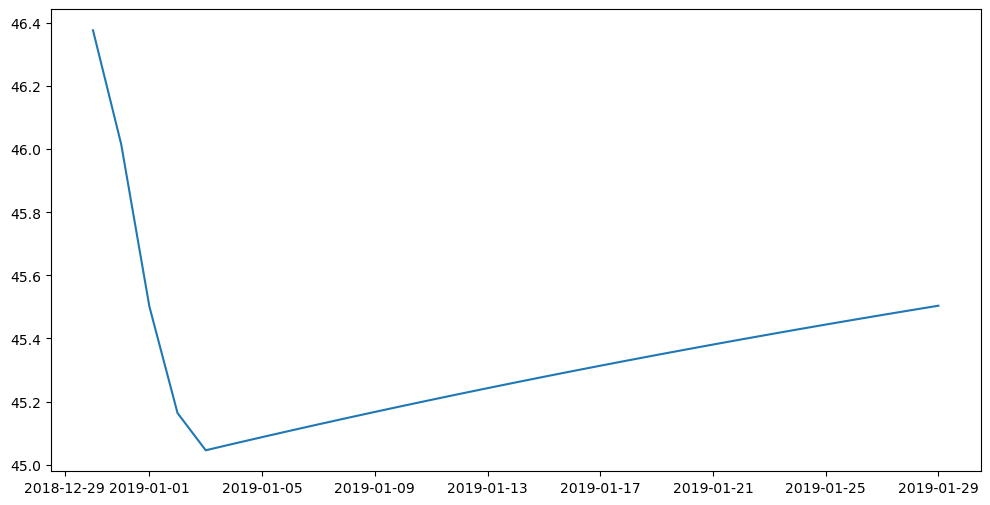

In [48]:
plt.figure(figsize=(12,6))
plt.plot(prediction_01)
plt.show()